In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Maximum finding using root finding

In [2]:
def one_A(x):
    return np.exp(-1*(x-2)**2)

In [3]:
def one_A_derivative(x):
    return 2*(x-2)*one_A(x)

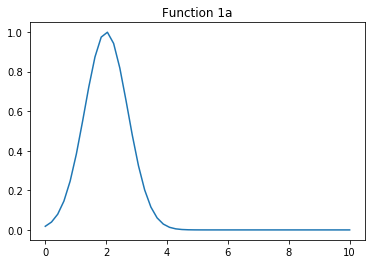

In [5]:
x = np.linspace(0, 10)
plt.plot(x, one_A(x))
plt.title("Function 1a")
plt.show();

In [17]:
def bisection_method(func, lower, upper, acc, MAX=100):
    
    ylower, yupper = func(lower), func(upper)

    if ylower * yupper >= 0:
        raise ValueError("Incorrect starting bracket")

    for i in range(MAX):
        # split bracket in half
        mid = (upper+lower)/2
#         print (i, mid)
        ymid = func(mid)
        # check if in lower or upper bracket
        if ylower * ymid <= 0:
            # lower bracket
            upper = mid
        else: 
            # its in upper bracket
            lower = mid
            
        if abs(upper-lower) < acc:
            break
            
    return lower,upper, i+1 

In [18]:
def secant_method(func, lower, upper, acc, MAX=100):
    ylower, yupper = func(lower), func(upper)
    
    if ylower * yupper >= 0:
        raise ValueError("Incorrect starting bracket")
    # smallest function value is 'most recent' guess = x2
    if abs(ylower) <= abs(yupper):
        x2 = lower
        x1 = upper
    else:
        x2 = upper
        x1 = lower
        
    for i in range(MAX):        
        # new value
        x3 = x1 - ( func(x1)*(x1-x2)  / (func(x1) - func(x2)) )
        # update values
        x1 = x2
        x2 = x3
        if abs(x1 - x2) < acc:
            break
        
    return x1, x2, i+1
        
        

In [20]:
def false_position(func, lower, upper, acc, MAX=100):
    """
    Same as secant, but recent points are the ones that
    bracket the root
    """
    ylower, yupper = func(lower), func(upper)
    
    if ylower * yupper >= 0:
        raise ValueError("Incorrect starting bracket")
    # smallest function value is 'most recent' guess = x2
    if abs(ylower) <= abs(yupper):
        x2 = lower
        x1 = upper
    else:
        x2 = upper
        x1 = lower
    
    for i in range(MAX):        
        # new value
        x3 = x1 - ( func(x1)*(x1-x2)  / (func(x1) - func(x2)) )
        # update values, most recent guess is two values that bracket
        if func(x3)*func(x2) <= 0: 
            # if new point has different sign, then update last point
            x1 = x2
        else:
            x1 = x1
        x2 = x3
        
        if abs(x1 - x2) < acc:
            break
        
    return x1, x2, i+1

In [23]:
print ("Bisection method to find maximum:")
result = bisection_method(one_A_derivative, 0, 5, acc=1e-8)
print (np.mean(result[:2]))
print (f'{result[-1]} iterations')

print ('\n')

print ("Secant method to find maximum:")
result = secant_method(one_A_derivative, 0, 5, acc=1e-8)
print (np.mean(result[:2]))
print (f'{result[-1]} iterations')

print ('\n')

print ("False position method to find maximum:")
result = false_position(one_A_derivative, 0, 5, acc=1e-8)
print (np.mean(result[:2]))
print (f'{result[-1]} iterations')


Bisection method to find maximum:
1.9999999972060323
29 iterations


Secant method to find maximum:
10.88829375040013
100 iterations


False position method to find maximum:
2.0000000005421503
14 iterations


# Minimizing function in 1D

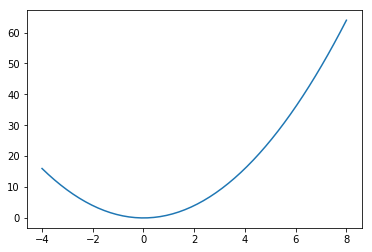

In [35]:
def func2a(x):
    return x**2

x = np.linspace(-4,8)
plt.plot(x,func2a(x))
plt.show();

In [61]:
def parabola_minimum(x1, x2, x3, f1, f2, f3):
    """
    return the point that minimizes the parabola that is fit through
    the three points x1, x2 and x3
    """
    L = (x2 - x1)*(f2-f3)
    M = (x2 - x3)*(f2-f1)
    
    # new point 
    xnew = x2 - ( ( (x2-x3)*M - (x2-x1)*L ) 
                / (2 * (M-L) ) )
    
    return xnew

def shift_variables(var1,var2,var3,var4):
    """
    shift variables, var1=var2, var2=var3 and var3=var4
    
    call as
    var1,var2,var3 = shift_variables(var1,var2,var3,var4)
    """
    # can remove this func
    return var2, var3, var4


def bracket_minimum(func, a, b, MAXITER=100):
    """
    Find a minimum by bracketing a function between a,b,c
    
    There is a minimum when f(a) >= f(b) and f(c) >= f(b)
    
    returns new bracket a,b,c
    """
    
    fa, fb = func(a), func(b)
    
    if fb >= fa:
        a, b = b, a
    # step size
    w = 1.618 # golden ratio
    # first guess for c
    c = b + (b-a) * w
    fc = func(c)
    
    if fc >= fb:
        # We found c already
        print ("Failure")
        return a, b, c
    
    it = 0
    while (fb > fc) and (it < MAXITER):
        it += 1 # to make sure we dont get inf loops
        
        # find a new point by fitting a parabola and set d to the minimum
        xnew = parabola_minimum(a,b,c,fa,fb,fc)
        print ("Xnew:", xnew)
        # make sure we don't step ridiculously far away
        xnew_limit = b + 100 * (c-b)
        
        if (a-xnew)*(xnew-c) > 0: 
            # If the new point is between b and c
            fnew = func(xnew)
            if (fnew < fc):
                # Then we have a minimum between b and c
                a = b
                b = xnew
                fa = fb
                fb = fnew
                return a, b, c
            
            elif (fnew > fb):
                # Then we have a minimum between a and xnew
                c = xnew
                fc = fnew
                return a, b, c
            
            # Parabolic fit failed, just do
            xnew = c + (c-b)*w
            fnew = func(xnew)
        elif ( (c-xnew)*(xnew-xnew_limit) > 0): 
            # new point is between c and limit
            print ("Between c and limit")
            fnew = func(xnew)
        
            if (fnew < fc): # new point is below func(c)
                # effectively 1,2,3 = 2,3,4
                b, c, xnew = shift_variables(b,c,xnew,xnew+(xnew-c)*w)
                fb, fc, fnew = shift_variables(fb,fc,fnew,func(xnew))
        elif ( (xnew - xnew_limit)*(xnew_limit-c) >= 0):
            xnew = xlim
            fnew = func(xnew)
                       
        else:          
            # its above the limit
            # better probably to just move a normal step
            xnew = c+ (c-b)*w
            fnew = func(xnew)
        
        # go to new points
        a, b, c = shift_variables(a,b,c,xnew)
        fa, fc, fc = shift_variables(fa,fc,fc,fnew)
        
    print ('Iterations', it)
    return a, b, c
        
                       
            
            
            
def easy_bracketing(func, a, b, MAXITER=100):
    fa, fb = func(a), func(b)
    
    if fb >= fa:
        a, b = b, a
    # step size
    w = 1.618 # golden ratio
    # guess for c
    c = b + (b-a) * w
    fc = func(c)
    
    it = 0
    while (fc < fb) and it < MAXITER:
        if it != 0:
            a = b
            b = c
        
        it += 1 # to prevent inf loop
        
        # new guess
        c = b + (b-a) * w
        fc = func(c)
        
        
    
    return a, b, c
    
        
    

In [62]:
# a, b = -4, -3
# for i in range(4):
#     print (i)
#     a, b, c = bracket_minimum(func2a, a, b, MAXITER=100)
#     print (a, b, c)

a, b = -4, -3
a, b, c = easy_bracketing(func2a, a, b)
print ("New a,b,c", a,b,c)

New a,b,c -1.382 1.2359240000000005 5.471725032000002
